# **Data Resampling**

#### **Import Necessary Libraries**

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

---

In [3]:
df = pd.read_csv('datasets/merged200k.csv')
df

,Track Name,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,track_id
0,act ii: date @ 8 (feat. Drake) - remix,NaN,0.550,0.545,0.0,-9.304,1.0,0.1630,0.3180,0.000000,0.0608,0.412,102.469,4.0,86,3QS9ZCtoSCJhmaJ7QNXSAS
1,LEAP!,NaN,0.892,0.585,11.0,-7.269,1.0,0.1020,0.1460,0.000004,0.0881,0.244,104.011,4.0,38,3vl2uH4D2QItFFhzz5L06g
2,Overdrive,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.0101,0.000000,0.1410,0.460,104.959,4.0,66,3QyoC6OvQUmpQwQZ18iaTs
3,Raise y_our glass,NaN,0.567,0.503,8.0,-6.119,1.0,0.1240,0.5810,0.000000,0.3690,0.184,72.798,4.0,59,7j1vFohEm1lbsctYY9gyGd
4,In My Mind,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.7890,0.002750,0.3450,0.323,135.936,3.0,72,2W779g2UrRZtVdf3FcEOO1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191391,Quickly (feat. Brandy),Soul,0.736,0.701,A#,-4.345,Minor,0.1000,0.2310,0.000000,0.2030,0.770,99.991,4/4,39,1U0OMWvR89Cm20vCNar50f
191392,P.O.P.,Soul,0.802,0.516,D,-9.014,Major,0.2130,0.1040,0.000485,0.1050,0.482,175.666,4/4,43,2gGqKJWfWbToha2YmDxnnj
191393,I'll Take Care Of You - Single Version,Soul,0.423,0.337,A#,-13.092,Minor,0.0436,0.5660,0.000000,0.2760,0.497,80.023,4/4,32,2iZf3EUedz9MPqbAvXdpdA
191394,Burning Fire,Soul,0.785,0.683,E,-6.944,Minor,0.0337,0.0329,0.000880,0.2370,0.969,113.830,4/4,38,1qWZdkBl4UVPj9lK6HuuFM


## **Section 1: Regression Sampling Methods**

#### <u>**Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise (SMOGN)**</u>

In [4]:
df = df.reset_index(drop=True)

In [5]:
import smogn
df_smogn = smogn.smoter(
    
    ## main arguments
    data = df,         ## pandas dataframe
    y = 'Track Popularity',   ## string ('header name')
    k = 9,                    ## positive integer (k < n)
    samp_method = 'balance',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 1,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 1.5            ## positive real number (0 < R)
)

r_index: 100%|##########| 157/157 [00:00<00:00, 829.49it/s]


## **Visualisation of Resampled Data as a Regression Problem**

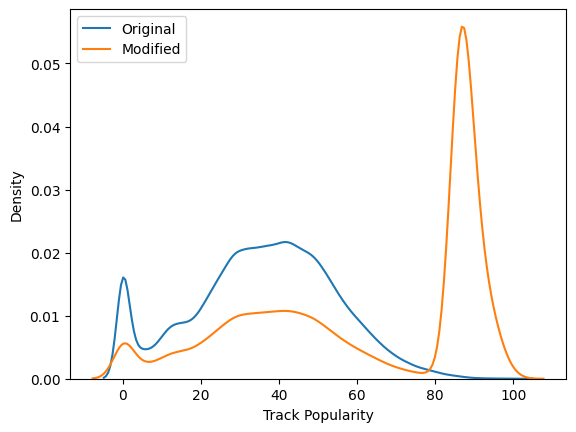

In [6]:
## Compare track popularity distribution before and after sampling using SMOGN
sb.kdeplot(df['Track Popularity'], label = "Original")
sb.kdeplot(df_smogn['Track Popularity'], label = "Modified")
plt.legend()
plt.show()

#### **Conclusions**

SMOGN <u>over-sampled "minority" observations</u> and <u>under-sampled "majority" observations</u> in a continuous response variable according to the box plot. In this case, the minority are Spotify tracks with high popularity (of around 60-80), and the majority are Spotify tracks with low popularity (of around 0-60).

As such, the modified SMOGN dataset increases the amount of tracks with high popularity and decreases the amount of tracks with low popularity, as seen in the above kde plot.

Overall, there will be a more even number of data points with high popularity and low popularity, which allows regression models to be less biased towards predicting not-popular songs.

In [7]:
# Write SMOGN-resampled dataframe to a CSV file
df_smogn.to_csv("datasets/smogn-reg.csv")

---

## **Section 2: Classification Sampling Methods**

### **Converting Regression Problem into Classification Problem**
We decided to convert the regression problem into a classification problem as well to determine which can produce a better score.
> Track Popularity scores >50 were taken to be popular songs, while scores ≤50 are taken to be not-popular.

In [8]:
threshold = 50
df['Track Popularity Cat'] = df['Track Popularity'].apply(lambda x: 1 if x > threshold else 0)

In [10]:
print("Distribution of popular and not-popular tracks in original dataset")
df['Track Popularity Cat'].value_counts(normalize = True)

Distribution of popular and not-popular tracks in original dataset


Track Popularity Cat
0    0.781709
1    0.218291
Name: proportion, dtype: float64

There are significantly more not-popular tracks as compared to popular tracks (78% vs 22%). As such, the models trained on the original dataset will struggle with predicting popular songs as compared to not-popular songs. 

Let's try to balance out the ratio between not-popular and popular tracks using various sampling methods aimed for classification.

In [11]:
# Form training data
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]
track_pop_cat= pd.DataFrame(df['Track Popularity Cat'])   # Response
voice_analysis = pd.DataFrame(df[predictors]) # Predictor

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(voice_analysis, track_pop_cat, test_size = 0.25, random_state=10)

#### <u>**Random Over Sampling**</u>

In [12]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=101)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print("Not-popular vs popular tracks in the training dataset")
print(y_train_ros.value_counts()[0], ':', y_train_ros.value_counts()[1])

Not-popular vs popular tracks in the training dataset
112280 : 112280


In [13]:
rdmover = pd.concat([X_train_ros, y_train_ros], axis=1)
rdmover.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity Cat
0,0.889,0.671,-7.111,0.0934,0.00623,0.000002,0.1320,0.439,149.982,1
1,0.795,0.859,-6.009,0.0358,0.05130,0.000001,0.0228,0.969,121.827,0
2,0.623,0.721,-10.520,0.0276,0.30200,0.000122,0.0838,0.782,101.431,0
3,0.550,0.835,-8.517,0.1480,0.00827,0.000000,0.0616,0.276,92.053,0
4,0.575,0.808,-3.485,0.0330,0.14500,0.000000,0.0898,0.479,96.975,0


In [14]:
# Write random oversampling dataframe to a CSV file
rdmover.to_csv('datasets/rdmover.csv')

#### <u>**Synthetic Minority Oversampling Technique (SMOTE)**</u>

In [15]:
from imblearn.over_sampling import SMOTE

# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print("Not-popular vs popular tracks in the training dataset")
print(y_train_smote.value_counts()[0], ':', y_train_smote.value_counts()[1])

Not-popular vs popular tracks in the training dataset
112280 : 112280


In [16]:
smotedf = pd.concat([X_train_smote, y_train_smote], axis=1)
smotedf.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity Cat
0,0.889,0.671,-7.111,0.0934,0.00623,0.000002,0.1320,0.439,149.982,1
1,0.795,0.859,-6.009,0.0358,0.05130,0.000001,0.0228,0.969,121.827,0
2,0.623,0.721,-10.520,0.0276,0.30200,0.000122,0.0838,0.782,101.431,0
3,0.550,0.835,-8.517,0.1480,0.00827,0.000000,0.0616,0.276,92.053,0
4,0.575,0.808,-3.485,0.0330,0.14500,0.000000,0.0898,0.479,96.975,0


In [17]:
# Write SMOTE dataframe to a CSV file
smotedf.to_csv('datasets/smote.csv')

#### <u>**Random Under Sampling**</u>

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=101)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

# Check the number of records after under sampling
print("Not-popular vs popular tracks in the training dataset")
print(y_train_rus.value_counts()[0], ':', y_train_rus.value_counts()[1])

Not-popular vs popular tracks in the training dataset
31267 : 31267


In [19]:
rdmunder = pd.concat([X_train_rus, y_train_rus], axis=1)
rdmunder.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity Cat
113674,0.410,0.0715,-18.990,0.0331,0.97700,0.931000,0.0673,0.285,94.884,0
49572,0.586,0.9300,-3.465,0.0445,0.00143,0.000005,0.2520,0.470,125.032,0
185842,0.525,0.6930,-7.383,0.0486,0.69400,0.011600,0.0776,0.814,186.688,0
165041,0.684,0.0951,-26.353,0.4900,0.67800,0.000000,0.2580,0.350,82.706,0
6771,0.284,0.9640,-4.890,0.3700,0.05430,0.000000,0.1020,0.588,89.144,0


In [20]:
# Write random undersampling dataframe to a CSV file
rdmunder.to_csv('datasets/rdmunder.csv')

#### <u>**NearMiss**</u>

In [21]:
from imblearn.under_sampling import NearMiss

# Under sample the majority class
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print("Not-popular vs popular tracks in the training dataset")
print(y_train_rus.value_counts()[0], ':', y_train_rus.value_counts()[1])

Not-popular vs popular tracks in the training dataset
31267 : 31267


In [22]:
nm = pd.concat([X_train_ros, y_train_ros], axis=1)
nm.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity Cat
0,0.889,0.671,-7.111,0.0934,0.00623,0.000002,0.1320,0.439,149.982,1
1,0.795,0.859,-6.009,0.0358,0.05130,0.000001,0.0228,0.969,121.827,0
2,0.623,0.721,-10.520,0.0276,0.30200,0.000122,0.0838,0.782,101.431,0
3,0.550,0.835,-8.517,0.1480,0.00827,0.000000,0.0616,0.276,92.053,0
4,0.575,0.808,-3.485,0.0330,0.14500,0.000000,0.0898,0.479,96.975,0


In [23]:
# Write NearMiss sampled dataframe to a CSV file
nm.to_csv('datasets/nearmiss.csv')

#### <u>**Using the SMOGN Oversampled Dataset from the Regression Problem**</u>

In [24]:
df_smogn = pd.read_csv('datasets/smogn-reg.csv')
df_smogn['Track Popularity Cat'] = df_smogn['Track Popularity'].apply(lambda x: 1 if x > threshold else 0)

predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]
track_pop_cat= pd.DataFrame(df_smogn['Track Popularity Cat'])   # Response
voice_analysis = pd.DataFrame(df_smogn[predictors]) # Predictor

# Train-test Split
X_train_smogn, X_test_smogn, y_train_smogn, y_test_smogn = train_test_split(voice_analysis, track_pop_cat, test_size = 0.25, random_state=10)

# Check the number of records after over sampling
print("Not-popular vs popular tracks in the training dataset")
print(y_train_smogn.value_counts()[0], ':', y_train_smogn.value_counts()[1])

Not-popular vs popular tracks in the training dataset
56249 : 87086


In [25]:
smogn_c = pd.concat([X_train_smogn, y_train_smogn], axis=1)

In [26]:
# Write random oversampling dataframe to a CSV file
smogn_c.to_csv('datasets/smogn-class.csv')

---

## **Visualisation of Resampled Data as a Classification Problem**

In [27]:
# Convert original dataset into a classification problem
df['Track Populatity Cat'] = df['Track Popularity'].apply(lambda x: 1 if x > threshold else 0)

predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]
track_pop_cat= pd.DataFrame(df['Track Popularity Cat'])   # Response
voice_analysis = pd.DataFrame(df[predictors]) # Predictor

# Train-test Split
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(voice_analysis, track_pop_cat, test_size = 0.25, random_state=10)

originaldf = pd.concat([X_train_og, y_train_og], axis=1)

Text(0.5, 0, 'SMOGN as Classification Problem')

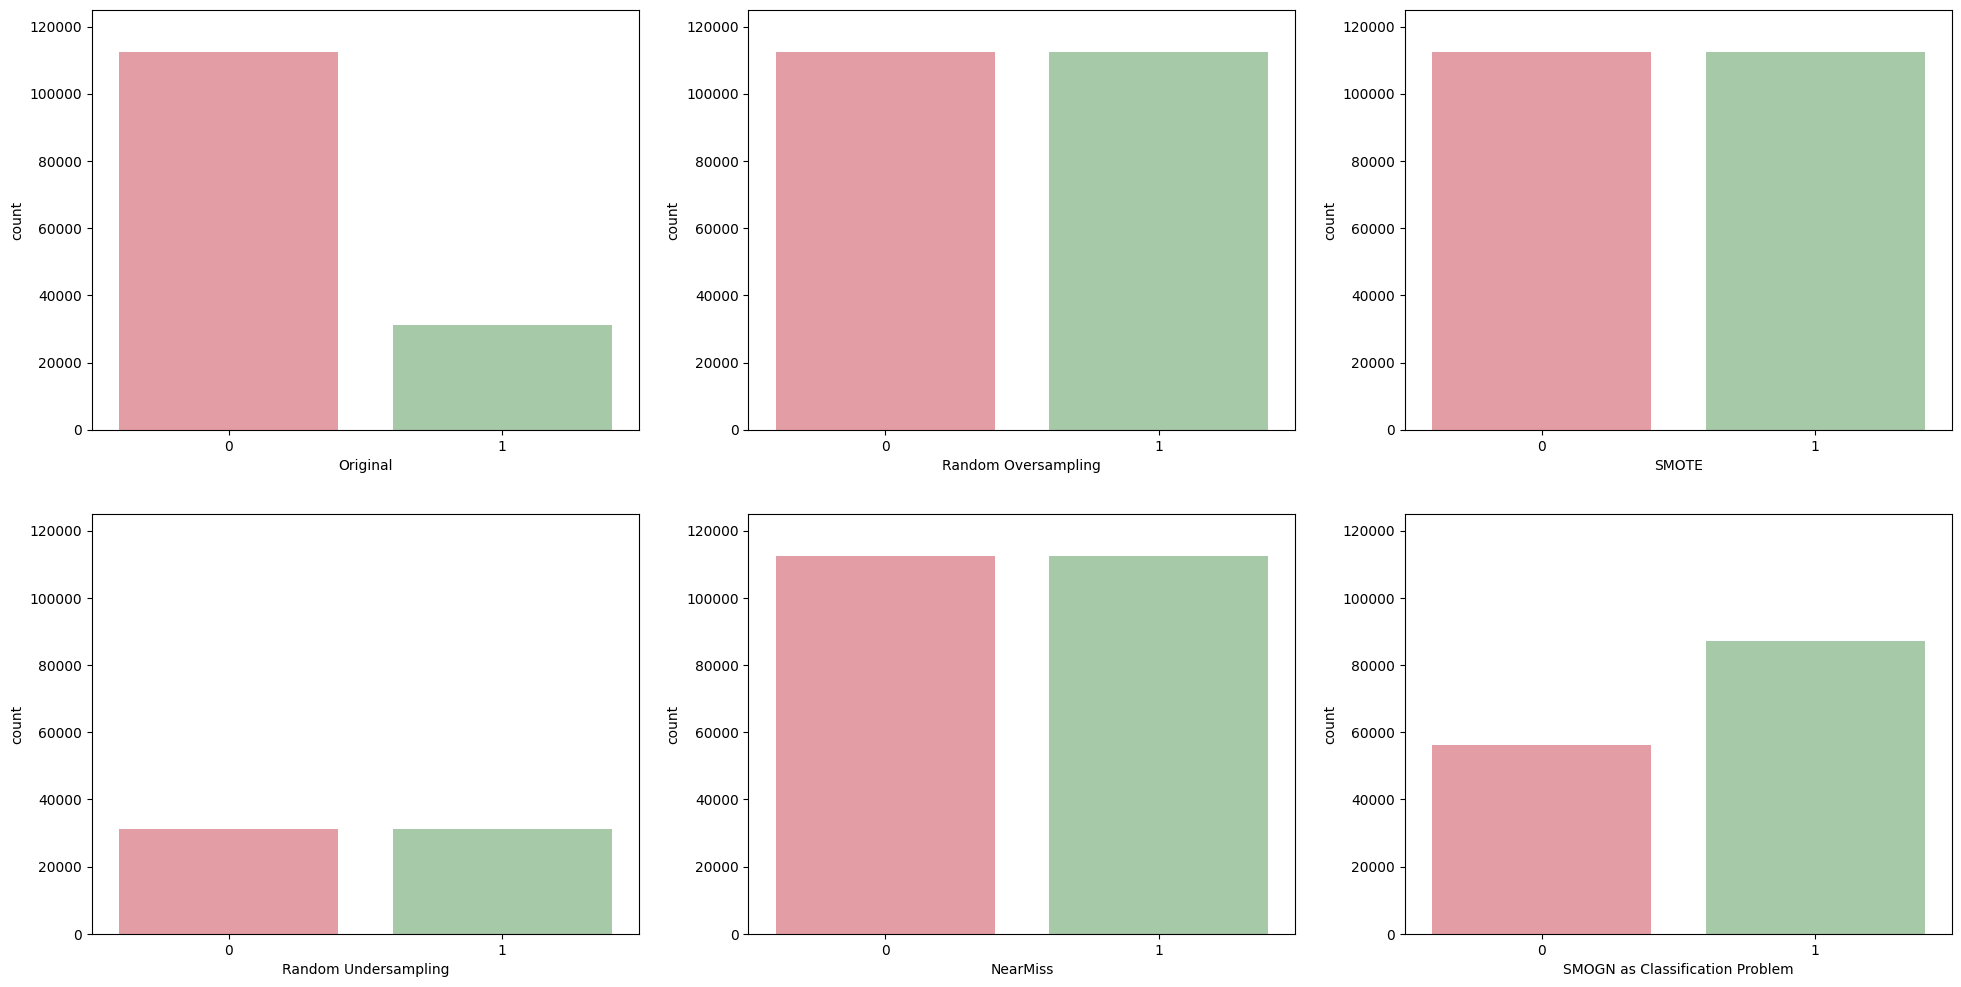

In [28]:
"""
originaldf : Original dataset as a classification problem
rdmover : Random Oversampling
smotedf : SMOTE
rdmunder : Random Undersampling
nm : NearMiss
smogn_c: Using df_smogn as a classification problem
"""

f, axes = plt.subplots(2,3, figsize=(24,12))
plt.setp(axes,ylim=(0,125000))

o = sb.countplot(x=originaldf['Track Popularity Cat'], hue=originaldf['Track Popularity Cat'],
                 ax=axes[0,0], palette=['#EF919B',"#A0CFA2"], legend=False)
o.set_xlabel("Original")
ro = sb.countplot(x=rdmover['Track Popularity Cat'], hue=rdmover['Track Popularity Cat'],
                  ax=axes[0,1], palette=['#EF919B',"#A0CFA2"], legend=False)
ro.set_xlabel("Random Oversampling")
sm = sb.countplot(x=smotedf['Track Popularity Cat'], hue=smotedf['Track Popularity Cat'],
                  ax=axes[0,2], palette=['#EF919B',"#A0CFA2"], legend=False)
sm.set_xlabel("SMOTE")
ru = sb.countplot(x=rdmunder['Track Popularity Cat'], hue=rdmunder['Track Popularity Cat'],
                  ax=axes[1,0], palette=['#EF919B',"#A0CFA2"], legend=False)
ru.set_xlabel("Random Undersampling")
n = sb.countplot(x=nm['Track Popularity Cat'], hue=nm['Track Popularity Cat'],
                 ax=axes[1,1], palette=['#EF919B',"#A0CFA2"], legend=False)
n.set_xlabel("NearMiss")
smc = sb.countplot(x=smogn_c['Track Popularity Cat'], hue=smogn_c['Track Popularity Cat'],
                   ax=axes[1,2], palette=['#EF919B',"#A0CFA2"], legend=False)
smc.set_xlabel("SMOGN as Classification Problem")

Overall, there is a more even number of data points with high popularity and low popularity for most of the resampled data, excluding SMOGN as a classification problem